In [10]:
!pip install edward

In [11]:
!pip install tensorflow==1.7

In [0]:
tf.ones([D, 2])

<tf.Tensor 'ones_9:0' shape=(1, 2) dtype=float32>

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from edward.models import Normal

plt.style.use('ggplot')

In [0]:
def build_toy_dataset(N=50, noise_std=0.1):
  x = np.linspace(-3, 3, num=N)
  y = np.cos(x) + np.random.normal(0, noise_std, size=N)
  x = x.astype(np.float32).reshape((N, 1))
  y = y.astype(np.float32)
  return x, y


def neural_network(x, W_0, W_1, b_0, b_1):
  h = tf.tanh(tf.matmul(x, W_0) + b_0)
  h = tf.matmul(h, W_1) + b_1
  return tf.reshape(h, [-1])

In [0]:
N = 50  # number of data points
D = 1  # number of features

x_train, y_train = build_toy_dataset(N)

W_0 = Normal(loc=tf.zeros([D, 2]), scale=tf.ones([D, 2]))
W_1 = Normal(loc=tf.zeros([2, 1]), scale=tf.ones([2, 1]))
b_0 = Normal(loc=tf.zeros(2), scale=tf.ones(2))
b_1 = Normal(loc=tf.zeros(1), scale=tf.ones(1))

x = x_train
y = Normal(loc=neural_network(x, W_0, W_1, b_0, b_1), scale=0.1 * tf.ones(N))


In [20]:
x

array([[-3.        ],
       [-2.877551  ],
       [-2.7551022 ],
       [-2.632653  ],
       [-2.510204  ],
       [-2.3877552 ],
       [-2.2653062 ],
       [-2.142857  ],
       [-2.0204082 ],
       [-1.8979592 ],
       [-1.7755102 ],
       [-1.6530613 ],
       [-1.5306122 ],
       [-1.4081633 ],
       [-1.2857143 ],
       [-1.1632653 ],
       [-1.0408163 ],
       [-0.9183673 ],
       [-0.79591835],
       [-0.67346936],
       [-0.5510204 ],
       [-0.42857143],
       [-0.30612245],
       [-0.18367347],
       [-0.06122449],
       [ 0.06122449],
       [ 0.18367347],
       [ 0.30612245],
       [ 0.42857143],
       [ 0.5510204 ],
       [ 0.67346936],
       [ 0.79591835],
       [ 0.9183673 ],
       [ 1.0408163 ],
       [ 1.1632653 ],
       [ 1.2857143 ],
       [ 1.4081633 ],
       [ 1.5306122 ],
       [ 1.6530613 ],
       [ 1.7755102 ],
       [ 1.8979592 ],
       [ 2.0204082 ],
       [ 2.142857  ],
       [ 2.2653062 ],
       [ 2.3877552 ],
       [ 2

In [26]:
y_train

array([-1.0604285 , -0.8693823 , -0.8345406 , -0.7668654 , -0.9996215 ,
       -0.8243137 , -0.591146  , -0.584003  , -0.5369474 , -0.26033312,
       -0.21882983, -0.06668315,  0.07011272,  0.14182284,  0.2468394 ,
        0.3490541 ,  0.5675265 ,  0.72056377,  0.7645676 ,  0.7702054 ,
        0.6634362 ,  0.82917345,  0.79745835,  1.047818  ,  0.84113926,
        0.91485286,  0.87556213,  0.99559295,  1.0791566 ,  0.92570806,
        0.87919515,  0.6298491 ,  0.5208139 ,  0.42499372,  0.4059856 ,
        0.348356  ,  0.10406914,  0.08998525, -0.12293843, -0.23460887,
       -0.24617   , -0.67546505, -0.5314757 , -0.6268747 , -0.7729399 ,
       -0.7881129 , -0.91194594, -0.85150015, -0.98810863, -0.84949476],
      dtype=float32)

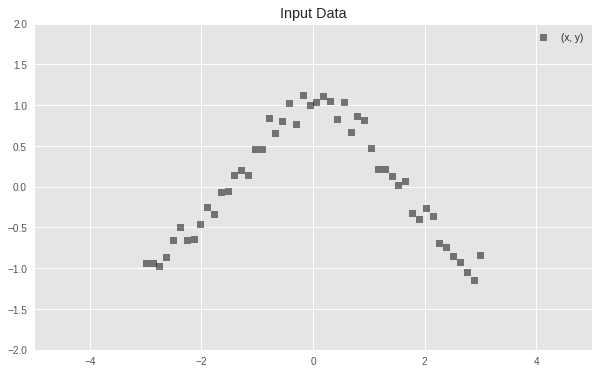

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_title("Input Data")
ax.plot(x_train, y_train, 'ks', alpha=0.5, label='(x, y)')
ax.set_xlim([-5, 5])
ax.set_ylim([-2, 2])
ax.legend()
plt.show()

In [0]:
qW_0 = Normal(loc=tf.get_variable("qW_0/loc", [D, 2]), scale=tf.nn.softplus(tf.get_variable("qW_0/scale", [D, 2])))
qW_1 = Normal(loc=tf.get_variable("qW_1/loc", [2, 1]), scale=tf.nn.softplus(tf.get_variable("qW_1/scale", [2, 1])))

qb_0 = Normal(loc=tf.get_variable("qb_0/loc", [2]), scale=tf.nn.softplus(tf.get_variable("qb_0/scale", [2])))
qb_1 = Normal(loc=tf.get_variable("qb_1/loc", [1]), scale=tf.nn.softplus(tf.get_variable("qb_1/scale", [1])))


In [21]:
qW_0
qW_1

<ed.RandomVariable 'Normal_6/' shape=(2, 1) dtype=float32>

In [22]:
qb_0
qb_1

<ed.RandomVariable 'Normal_8/' shape=(1,) dtype=float32>

In [0]:
 # Sample functions from variational model to visualize fits.
rs = np.random.RandomState(0)
inputs = np.linspace(-5, 5, num=400, dtype=np.float32)
x = tf.expand_dims(inputs, 1)
mus = tf.stack([
    neural_network(x, qW_0.sample(), qW_1.sample(), qb_0.sample(), qb_1.sample()) for _ in range(10)
])


In [25]:
mus

<tf.Tensor 'stack:0' shape=(10, 400) dtype=float32>

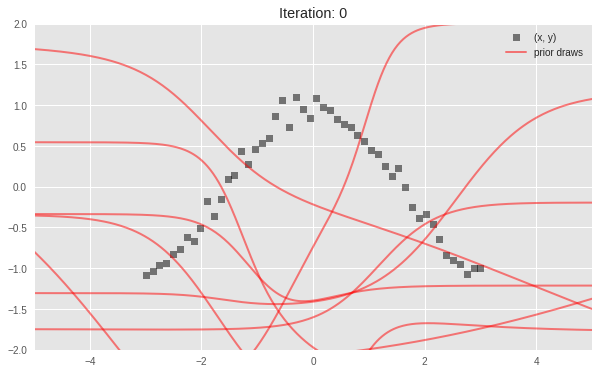

In [24]:
 # FIRST VISUALIZATION (prior)

sess = ed.get_session()
tf.global_variables_initializer().run()
outputs = mus.eval()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_title("Iteration: 0")
ax.plot(x_train, y_train, 'ks', alpha=0.5, label='(x, y)')
ax.plot(inputs, outputs[0].T, 'r', lw=2, alpha=0.5, label='prior draws')
ax.plot(inputs, outputs[1:].T, 'r', lw=2, alpha=0.5)
ax.set_xlim([-5, 5])
ax.set_ylim([-2, 2])
ax.legend()
plt.show()


In [25]:
inference = ed.KLqp({W_0: qW_0, b_0: qb_0, W_1: qW_1, b_1: qb_1}, data={y: y_train})
inference.run(n_iter=1000, n_samples=5)

/usr/local/lib/python3.6/dist-packages/edward/util/random_variables.py:52: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


1000/1000 [100%] ██████████████████████████████ Elapsed: 4s | Loss: -13.365


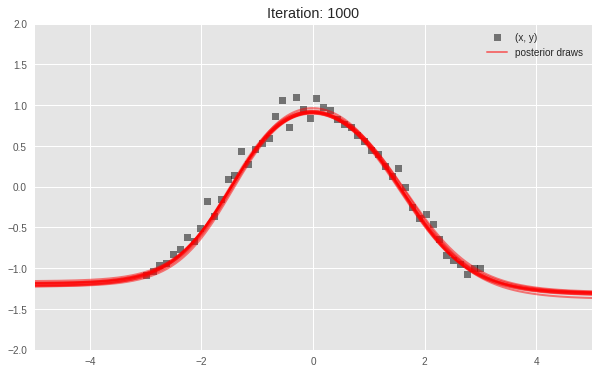

In [26]:
 # SECOND VISUALIZATION (posterior)

outputs = mus.eval()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_title("Iteration: 1000")
ax.plot(x_train, y_train, 'ks', alpha=0.5, label='(x, y)')
ax.plot(inputs, outputs[0].T, 'r', lw=2, alpha=0.5, label='posterior draws')
ax.plot(inputs, outputs[1:].T, 'r', lw=2, alpha=0.5)
ax.set_xlim([-5, 5])
ax.set_ylim([-2, 2])
ax.legend()
plt.show()